# Missing Data

## Overview

The following pandas functions and methods are helpful when dealing with missing data.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


### 1. `df.info()`
**Description**: A DataFrame method that returns a concise summary of the dataframe, including a ‘non-null count,’ which helps you know the number of missing values.

#### Example:



In [2]:

data = {
    'planet': ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
    'radius_km': [2440, 6052, 6371, 3390, 69911, 58232, 25362, 24622],
    'moons': [0, 0, 1, 2, 80, 83, 27, 14]
}


df = pd.DataFrame(data)
print(df)
print()
df.info()

### 2. `df.isna()` / `df.isnull()`
**Description**: A pandas function that returns a same-sized Boolean array indicating whether each value is null (you can also use `pd.isnull()` as an alias). This function also exists as a DataFrame method.

#### Example:


In [3]:
data = {
    'Planet': ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
    'radius_km': [2440, 6052, 6371, 3390, 69911, 58232, 25362, 24622],
    'moons': [np.nan, np.nan, 1, np.nan, 80, 83, 27, 14]
}

In [4]:

df = pd.DataFrame(data)
print(df)
print('\n After pd.isnull(): \n')
print(pd.isnull(df))

    Planet  radius_km  moons
0  Mercury       2440    NaN
1    Venus       6052    NaN
2    Earth       6371    1.0
3     Mars       3390    NaN
4  Jupiter      69911   80.0
5   Saturn      58232   83.0
6   Uranus      25362   27.0
7  Neptune      24622   14.0

 After pd.isnull(): 

   Planet  radius_km  moons
0   False      False   True
1   False      False   True
2   False      False  False
3   False      False   True
4   False      False  False
5   False      False  False
6   False      False  False
7   False      False  False


### 3. `pd.notna()` / `df.notnull()`
**Description**: A pandas function that returns a same-sized Boolean array indicating whether each value is **NOT null** (you can also use `pd.notnull()` as an alias). This function also exists as a DataFrame method.

#### Example:

In [5]:
print(df)
print('\n After pd.notnull(): \n')
print(pd.notnull(df))

    Planet  radius_km  moons
0  Mercury       2440    NaN
1    Venus       6052    NaN
2    Earth       6371    1.0
3     Mars       3390    NaN
4  Jupiter      69911   80.0
5   Saturn      58232   83.0
6   Uranus      25362   27.0
7  Neptune      24622   14.0

 After pd.notnull(): 

   Planet  radius_km  moons
0    True       True  False
1    True       True  False
2    True       True   True
3    True       True  False
4    True       True   True
5    True       True   True
6    True       True   True
7    True       True   True


### 4. `df.fillna()`
**Description**: A DataFrame method that fills in missing values using a specified method.

#### Example:

In [6]:
animal_data = {
    'animal': ['cardinal', 'gecko', 'raven'],
    'class': ['Aves', 'Reptilia', 'Aves'],
    'color': ['red', 'green', 'black'],
    'legs': [np.nan, 4, np.nan]
}

In [7]:
animal_df = pd.DataFrame(animal_data)
print(animal_df)
print('\n After fillna(): \n')
print(animal_df.fillna(2))

     animal     class  color  legs
0  cardinal      Aves    red   NaN
1     gecko  Reptilia  green   4.0
2     raven      Aves  black   NaN

 After fillna(): 

     animal     class  color  legs
0  cardinal      Aves    red   2.0
1     gecko  Reptilia  green   4.0
2     raven      Aves  black   2.0


### 5. `df.replace()`
**Description**: A DataFrame method that replaces specified values with other specified values. Can also be applied to pandas Series.

#### Example:

In [8]:
print(animal_df)
print('\n After replace(): \n')
print(animal_df.replace('Aves', 'bird'))

     animal     class  color  legs
0  cardinal      Aves    red   NaN
1     gecko  Reptilia  green   4.0
2     raven      Aves  black   NaN

 After replace(): 

     animal     class  color  legs
0  cardinal      bird    red   NaN
1     gecko  Reptilia  green   4.0
2     raven      bird  black   NaN


### 6. `df.dropna()`
**Description**: A DataFrame method that removes rows or columns that contain missing values, depending on the axis you specify.

#### Example:

In [10]:
missing_data = {
    'animal': [np.nan, 'gecko', 'raven'],
    'class': ['Aves', 'Reptilia', 'Aves'],
    'color': ['red', 'green', np.nan],
    'legs': [2, 4, 2]
}

In [11]:
missing_df = pd.DataFrame(missing_data)
print('Original df: \n\n', missing_df)
print('\n After dropna(axis=0): \n')
print(missing_df.dropna(axis=0))

print('\n After dropna(axis=1): \n')
print(missing_df.dropna(axis=1))

Original df: 

   animal     class  color  legs
0    NaN      Aves    red     2
1  gecko  Reptilia  green     4
2  raven      Aves    NaN     2

 After dropna(axis=0): 

  animal     class  color  legs
1  gecko  Reptilia  green     4

 After dropna(axis=1): 

      class  legs
0      Aves     2
1  Reptilia     4
2      Aves     2


# Outliers

### 1. `df.describe()`
**Description**: A DataFrame method that returns general statistics about the dataframe, which can help determine outliers.

#### Example:

In [12]:
print(df)
print()
print(df.describe())

    Planet  radius_km  moons
0  Mercury       2440    NaN
1    Venus       6052    NaN
2    Earth       6371    1.0
3     Mars       3390    NaN
4  Jupiter      69911   80.0
5   Saturn      58232   83.0
6   Uranus      25362   27.0
7  Neptune      24622   14.0

          radius_km      moons
count      8.000000   5.000000
mean   24547.500000  41.000000
std    26191.633528  38.111678
min     2440.000000   1.000000
25%     5386.500000  14.000000
50%    15496.500000  27.000000
75%    33579.500000  80.000000
max    69911.000000  83.000000


### 2. `sns.boxplot()`
**Description**: A seaborn function that generates a box plot. Data points beyond 1.5x the interquartile range are considered outliers.

#### Example:

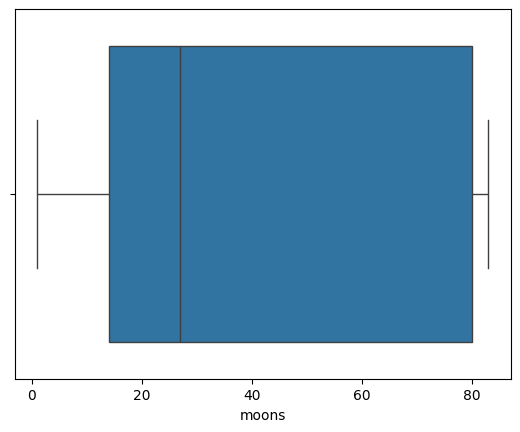

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='moons')
plt.show()

# Label Encoding

### 1. `df.astype()`
**Description**: A DataFrame method that allows you to encode its data as a specified dtype. This method can also be used on Series objects.

#### Example:

In [14]:
print(animal_df)
print('\n Original dtypes of df: \n')
print(animal_df.dtypes)

animal_df['class'] = animal_df['class'].astype('category')
print('\n dtypes after casting \'class\' column as categorical: \n')
print(animal_df.dtypes)

     animal     class  color  legs
0  cardinal      Aves    red   NaN
1     gecko  Reptilia  green   4.0
2     raven      Aves  black   NaN

 Original dtypes of df: 

animal     object
class      object
color      object
legs      float64
dtype: object

 dtypes after casting 'class' column as categorical: 

animal      object
class     category
color       object
legs       float64
dtype: object


### 2. `Series.cat.codes`
**Description**: A Series attribute that returns the numeric category codes of the series.

#### Example:

In [15]:
print('\n \'class\' column: \n')
print(animal_df['class'])

print('\n Category codes of \'class\' column: \n')
print(animal_df['class'].cat.codes)


 'class' column: 

0        Aves
1    Reptilia
2        Aves
Name: class, dtype: category
Categories (2, object): ['Aves', 'Reptilia']

 Category codes of 'class' column: 

0    0
1    1
2    0
dtype: int8



### 3. `get_dummies()`
**Description**: Converts categorical values into new binary columns—one for each different category.

#### Example:

In [16]:
dummies = pd.get_dummies(animal_df['class'])
print(dummies)

    Aves  Reptilia
0   True     False
1  False      True
2   True     False


### 4. `LabelEncoder()`
**Description**: A transformer from `sklearn.preprocessing` that encodes specified categories or labels with numeric codes. Useful for normalizing labels or converting categorical labels into numeric.

#### Example:

In [17]:
# Instantiate LabelEncoder()
encoder = LabelEncoder()

In [18]:

data = ['paris', 'paris', 'tokyo', 'amsterdam']

# Fit to the data
encoder.fit(data)

# Transform the data
transformed = encoder.transform(data)

# Reverse the transformation
inverse = encoder.inverse_transform(transformed)

print('Data =', data)
print('\n Classes: \n', encoder.classes_)
print('\n Encoded (normalized) classes: \n', transformed)
print('\n Reverse from encoded classes to original: \n', inverse)

Data = ['paris', 'paris', 'tokyo', 'amsterdam']

 Classes: 
 ['amsterdam' 'paris' 'tokyo']

 Encoded (normalized) classes: 
 [1 1 2 0]

 Reverse from encoded classes to original: 
 ['paris' 'paris' 'tokyo' 'amsterdam']
